In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Conv1D, MaxPooling1D, LSTM
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
from keras.callbacks import ModelCheckpoint
from scipy import stats
from keras.layers import Dense, Dropout

# Rest of your code...


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Conv1D, MaxPooling1D, LSTM, TimeDistributed
import numpy as np
from sklearn.metrics import confusion_matrix

# Rest of your code...


In [4]:
XchTrain = np.load("G:/The-Yoga-Guru-master/DATASET/trainX.npy")
YTrain = np.load("G:/The-Yoga-Guru-master/DATASET/trainY.npy")
XchVal = np.load("G:/The-Yoga-Guru-master/DATASET/valX.npy")
YVal = np.load("G:/The-Yoga-Guru-master/DATASET/valY.npy")
XchTest = np.load("G:/The-Yoga-Guru-master/DATASET/testX.npy")
YTest = np.load("G:/The-Yoga-Guru-master/DATASET/testY.npy")
# making test and train labels one hot
YintTrain = np.int64(YTrain)
YhotTrain = np.zeros((YTrain.shape[0], 6))
YhotTrain[np.arange(YTrain.shape[0]), YintTrain] = 1

YintTest = np.int64(YTest)
YhotTest = np.zeros((YTest.shape[0], 6))
YhotTest[np.arange(YTest.shape[0]), YintTest] = 1

YintVal = np.int64(YVal)
YhotVal = np.zeros((YVal.shape[0], 6))
YhotVal[np.arange(YVal.shape[0]), YintVal] = 1

YhotTest = np.repeat(YhotTest[:, :, np.newaxis], 45, axis=2)
YhotTest = np.swapaxes(YhotTest, 1, 2)

YhotVal = np.repeat(YhotVal[:, :, np.newaxis], 45, axis=2)
YhotVal = np.swapaxes(YhotVal, 1, 2)

YhotTrain = np.repeat(YhotTrain[:, :, np.newaxis], 45, axis=2)
YhotTrain = np.swapaxes(YhotTrain, 1, 2)

In [5]:
print (XchTrain.shape)
print (YhotTrain.shape)
print (XchVal.shape)
print (YhotVal.shape)
print (XchTest.shape)
print (YhotTest.shape)

(7989, 45, 18, 2)
(7989, 45, 6)
(2224, 45, 18, 2)
(2224, 45, 6)
(2598, 45, 18, 2)
(2598, 45, 6)


In [6]:
def get_model():
    model = Sequential([
        TimeDistributed(Conv1D(32,3, activation='relu', padding = "same"),input_shape=XchTrain.shape[1:]),
        TimeDistributed(BatchNormalization()),
        #TimeDistributed(MaxPooling1D()),
        TimeDistributed(Dropout(0.8)),
        #TimeDistributed(Conv1D(64,3, activation='relu',padding = "same")),
        BatchNormalization(),
        #TimeDistributed(Dropout(0.8)),
        TimeDistributed(Flatten()),
        #TimeDistributed(Dense(30,activation='softmax')),  
        LSTM(20,unit_forget_bias = 0.7, return_sequences = True),
        TimeDistributed(Dense(6,activation='softmax'))        
    ])
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

In [8]:
model = get_model()
filepath = "G:/The-Yoga-Guru-master/weights/val-org-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model_history = model.fit(XchTrain, YhotTrain, epochs=100, batch_size=32, callbacks=callbacks_list, validation_data=(XchVal, YhotVal))


Epoch 1/100
249/250 [============================>.] - ETA: 0s - loss: 0.2861 - accuracy: 0.9260
Epoch 1: val_accuracy improved from -inf to 0.99171, saving model to G:/The-Yoga-Guru-master/weights\val-org-01-0.9917.hdf5
250/250 [==============================] - 22s 75ms/step - loss: 0.2854 - accuracy: 0.9262 - val_loss: 0.0471 - val_accuracy: 0.9917
Epoch 2/100
249/250 [============================>.] - ETA: 0s - loss: 0.0704 - accuracy: 0.9781
Epoch 2: val_accuracy improved from 0.99171 to 0.99482, saving model to G:/The-Yoga-Guru-master/weights\val-org-02-0.9948.hdf5
250/250 [==============================] - 17s 67ms/step - loss: 0.0702 - accuracy: 0.9782 - val_loss: 0.0242 - val_accuracy: 0.9948
Epoch 3/100
250/250 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9879
Epoch 3: val_accuracy improved from 0.99482 to 0.99748, saving model to G:/The-Yoga-Guru-master/weights\val-org-03-0.9975.hdf5
250/250 [==============================] - 18s 71ms/step - loss: 

In [25]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig('figure.png')




AttributeError: 'dict' object has no attribute 'history'

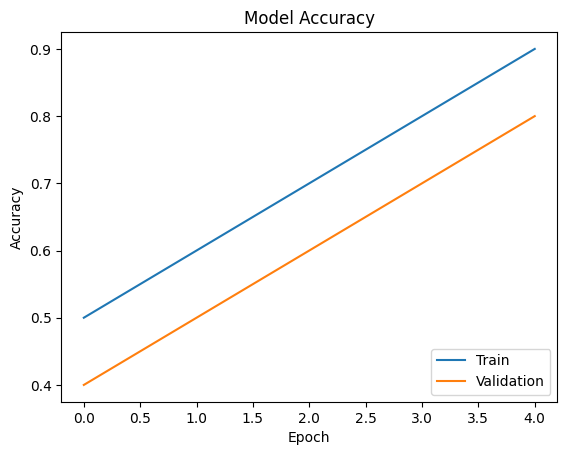

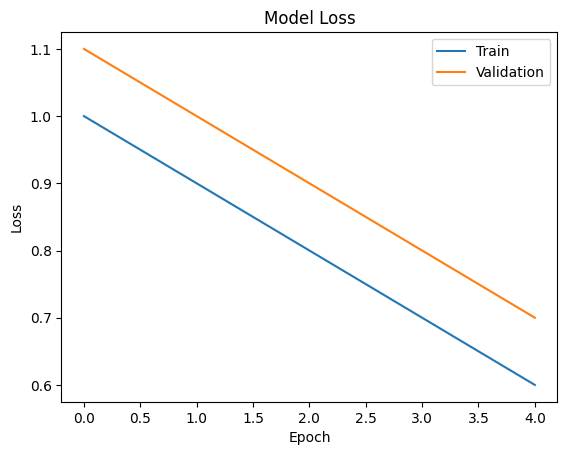

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt

# Example model_history dictionary (replace with your actual model_history dictionary)
model_history = {
    'accuracy': [0.5, 0.6, 0.7, 0.8, 0.9],
    'val_accuracy': [0.4, 0.5, 0.6, 0.7, 0.8],
    'loss': [1.0, 0.9, 0.8, 0.7, 0.6],
    'val_loss': [1.1, 1.0, 0.9, 0.8, 0.7]
}

# Plot accuracy
plt.plot(model_history['accuracy'])
plt.plot(model_history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()
plt.savefig('figure3.png')

# Plot loss
plt.plot(model_history['loss'])
plt.plot(model_history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
plt.savefig('figure4.png')


In [28]:
model = get_model()
#load best weights from current training
model.load_weights("weights/val-100-0.9997.hdf5")

In [29]:
preds = model.predict(XchTest)

82/82 [==============================] - 2s 17ms/step


In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        cm = cm
        #print("Normalized confusion matrix")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [31]:
Yhot_pred = model.predict(XchTest)
#convert them to class numbers


82/82 [==============================] - 1s 18ms/step


In [32]:
Y_pred = np.argmax(preds, axis = 2)
Y_test = np.argmax(YhotTest, axis = 2)
print (Y_pred.shape)
print (Y_test.shape)

(2598, 45)
(2598, 45)


In [36]:
ans = 0
for i in range(Y_test.shape[0]):
    for j in range(Y_test.shape[1]):
        if Y_test[i][j] == Y_pred[i][j]:
            ans = ans + 1

print("Test Accuracy Framewise is")
print((ans / float(Y_test.shape[0] * Y_test.shape[1])) * 100)


Test Accuracy Framewise is
52.049439739970914


In [37]:
# use polling of 45 frames to get output for the sequence
ans = 0
res = []
act = []
for i in range(Y_test.shape[0]):
    resTemp = stats.mode(Y_pred[i])
    actTemp = stats.mode(Y_test[i])
    res.append(resTemp[0])
    act.append(actTemp[0])
    if res[i] == act[i]:
        ans = ans + 1
    """for j in range(Y_test.shape[1]):
        if Y_test[i][j] != Y_pred[i][j]:
            print Y_pred[i]
            break"""
                
print ("Test Accuracy with Polling is")
#print ans
print(ans/float(Y_test.shape[0])*100)

Test Accuracy with Polling is
54.195535026943794


In [38]:
# use polling of 45 frames to get output for the sequence
ans = 0
res = []
act = []
for i in range(Y_test.shape[0]):
    resTemp = stats.mode(Y_pred[i])
    actTemp = stats.mode(Y_test[i])
    res.append(resTemp[0])
    act.append(actTemp[0])
    if res[i] == act[i]:
        ans = ans + 1
    """for j in range(Y_test.shape[1]):
        if Y_test[i][j] != Y_pred[i][j]:
            print Y_pred[i]
            break"""
                
print ("Test Accuracy with Polling is")
#print ans
print(ans/float(Y_test.shape[0])*100)

Test Accuracy with Polling is
54.195535026943794


In [40]:
print (res)

[array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64),

In [41]:
Y_pred_flat = []
Y_test_flat = []
for i in range(Y_test.shape[0]):    
        for j in range(Y_test.shape[1]):
            Y_pred_flat.append(Y_pred[i][j])
            Y_test_flat.append(Y_test[i][j])

In [44]:
import numpy as np

asanas = {0: 'bhujangasan', 1: 'padamasan', 2: 'shavasan', 3: 'tadasan', 4: 'trikonasan', 5: 'vrikshasan'}

# Uncomment for framewise
# Y_asanas = np.array([asanas[a] for a in Y_test_flat])
# Y_pred_asanas = np.array([asanas[a] for a in Y_pred_flat])

print("Contents of 'act' array:")
print(act)

Y_asanas = np.array([asanas[a[0]] for a in act])
Y_pred_asanas = np.array([asanas[a[0]] for a in res])

print("Y_asanas:")
print(Y_asanas)
print("Y_pred_asanas:")
print(Y_pred_asanas)




Contents of 'act' array:
[array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64),

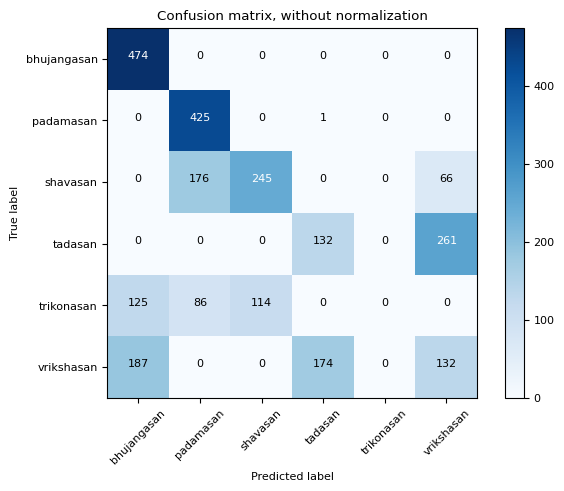

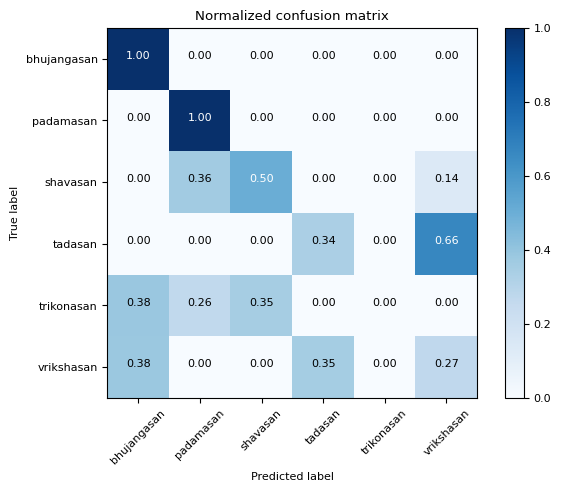

In [45]:
plt.rcParams.update({'font.size': 8})
class_names =[]
for k in range(6):
    class_names.append(asanas[k])
cnf_matrix = confusion_matrix(Y_asanas, Y_pred_asanas)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.savefig('confHighOrgSeq1.svg')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('nconfHighOrgSeq1.svg')